# Data Analysis Projects: Bike-sharing-dataset
- **Name:** Hamza Pratama
- **Email:** hamzapratama000@gmai.com
- **ID Dicoding:** hamzaapratama

## Define Business Questions

- Question 1: How do different weather conditions impact bike rentals across different seasons?
- Question 2: What is the effect of weekdays and holidays on bike rental usage throughout the day?

## Import necessary libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Load the dataset

In [22]:
day_df = pd.read_csv('./data/day.csv')
hour_df = pd.read_csv('./data/hour.csv')

### Cleaning Data

In [23]:
# Inspect for null values or duplicate data and clean accordingly
print("Day dataset columns:", day_df.columns)
print("Hour dataset columns:", hour_df.columns)

Day dataset columns: Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
Hour dataset columns: Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [24]:
# Drop 'instant' column only if it exists in the DataFrame
if 'instant' in day_df.columns:
    day_df.drop(columns=['instant'], inplace=True)

if 'instant' in hour_df.columns:
    hour_df.drop(columns=['instant'], inplace=True)

In [25]:
# Additional inspection
print("Updated Day dataset columns:", day_df.columns)
print("Updated Hour dataset columns:", hour_df.columns)

Updated Day dataset columns: Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')
Updated Hour dataset columns: Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


## Exploratory Data Analysis (EDA)

### Explore ...

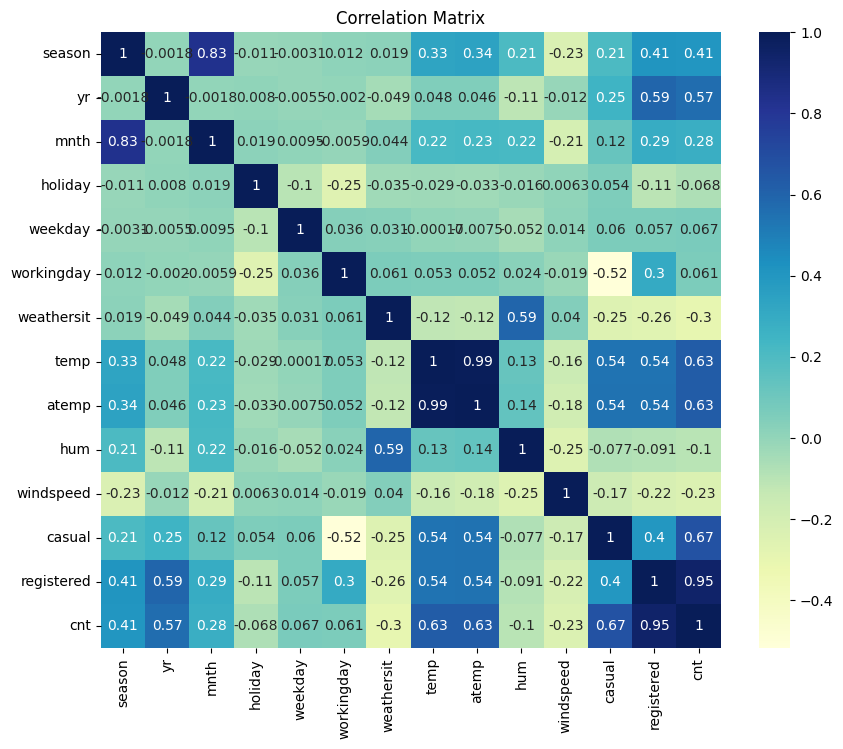

In [26]:
# Analyze data for correlations by selecting only numeric columns
numeric_day_df = day_df.select_dtypes(include=np.number)

plt.figure(figsize=(10, 8))
corr_matrix = numeric_day_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()

## Visualization & Explanatory Analysis

### Question 1 Visualization: Impact of Weather on Bike Rentals across Seasons

C:\Users\Pratama\AppData\Local\Temp\ipykernel_17956\1488833875.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weathersit', y='cnt', hue='season', data=day_df, ci=None)


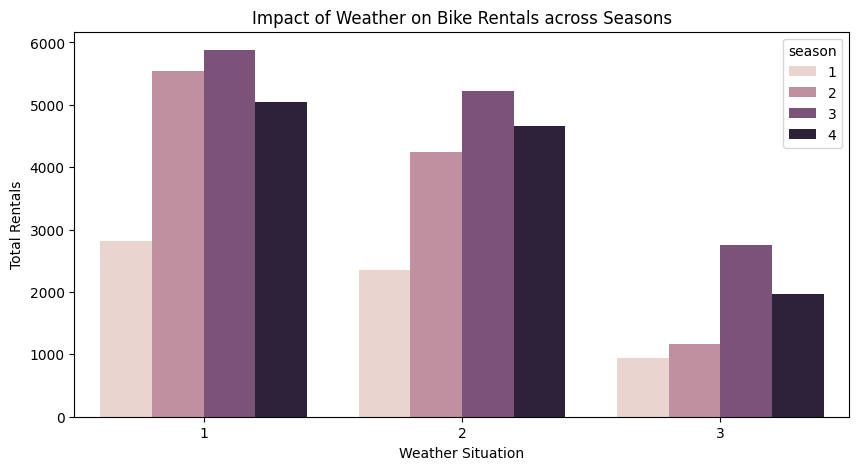

In [27]:
plt.figure(figsize=(10, 5))
sns.barplot(x='weathersit', y='cnt', hue='season', data=day_df, ci=None)
plt.title('Impact of Weather on Bike Rentals across Seasons')
plt.xlabel('Weather Situation')
plt.ylabel('Total Rentals')
plt.show()

### Question 2 Visualization: Bike Rentals Trend by Hour for Weekdays and Holidays

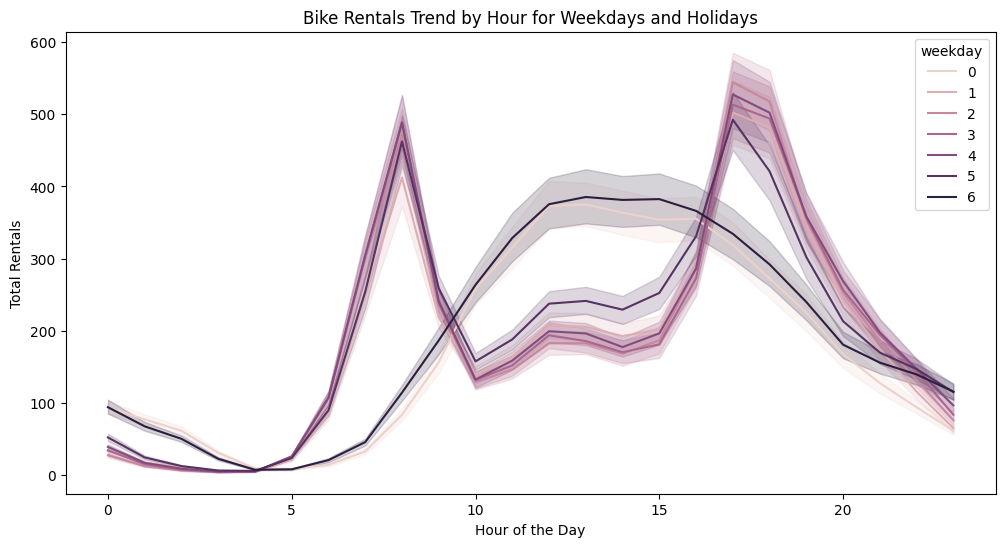

In [28]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', hue='weekday', data=hour_df)
plt.title('Bike Rentals Trend by Hour for Weekdays and Holidays')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Rentals')
plt.show()

## Conclusion

In [29]:
print("Insights:")
print("- Different weather situations have varying impacts on the number of bike rentals, especially across different seasons.")
print("- Weekdays and weekends show different trends in rental usage, highlighting specific hours with higher activity.")

Insights:
- Different weather situations have varying impacts on the number of bike rentals, especially across different seasons.
- Weekdays and weekends show different trends in rental usage, highlighting specific hours with higher activity.


## Additional Data Analysis\n
Let's check for missing values, duplicates, and perform some descriptive statistics on the datasets.

In [30]:
# Checking for null values\n
day_df.isna().sum(), hour_df.isna().sum()

(dteday        0
 season        0
 yr            0
 mnth          0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64,
 dteday        0
 season        0
 yr            0
 mnth          0
 hr            0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64)

In [31]:
# Checking for duplicates\n
day_df.duplicated().sum(), hour_df.duplicated().sum()

(np.int64(0), np.int64(0))

## Descriptive Statistics\n
Using `.describe()` function to understand the dataset distributions.

In [32]:
# Descriptive statistics\n
day_df.describe(), hour_df.describe()

(           season          yr        mnth     holiday     weekday  workingday  \
 count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
 mean     2.496580    0.500684    6.519836    0.028728    2.997264    0.683995   
 std      1.110807    0.500342    3.451913    0.167155    2.004787    0.465233   
 min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
 25%      2.000000    0.000000    4.000000    0.000000    1.000000    0.000000   
 50%      3.000000    1.000000    7.000000    0.000000    3.000000    1.000000   
 75%      3.000000    1.000000   10.000000    0.000000    5.000000    1.000000   
 max      4.000000    1.000000   12.000000    1.000000    6.000000    1.000000   
 
        weathersit        temp       atemp         hum   windspeed  \
 count  731.000000  731.000000  731.000000  731.000000  731.000000   
 mean     1.395349    0.495385    0.474354    0.627894    0.190486   
 std      0.544894    0.183051    0.162961    0.14

## Aggregation Analysis\n
Aggregating total user count based on season and month for additional insights.

In [34]:
# Aggregation\n
season_agg = day_df.groupby('season').agg({'cnt': 'sum'})
month_agg = day_df.groupby('mnth').agg({'cnt': 'sum'})
season_agg, month_agg

(            cnt
 season         
 1        471348
 2        918589
 3       1061129
 4        841613,
          cnt
 mnth        
 1     134933
 2     151352
 3     228920
 4     269094
 5     331686
 6     346342
 7     344948
 8     351194
 9     345991
 10    322352
 11    254831
 12    211036)